**IMPORT LIBRARIES**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


**IMPORT DATA**: 
Followings are data of three stocks: Amazon, Apple and Microsoft and data of S&P500 index from 01/01/2017 to 31/12/2022 collected from Yahoo Finance

In [5]:
Amazon = pd.read_csv('/AMZN.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()
Apple = pd.read_csv('/AAPL.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()
Microsoft = pd.read_csv('/MSFT.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()
SP500 = pd.read_csv('/SP500.csv', parse_dates = ['Date'], index_col = ['Date']).dropna()
SP500.info()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2022-12-30 to 2017-03-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1510 non-null   float64
 1   High       1510 non-null   float64
 2   Low        1510 non-null   float64
 3   Close      1510 non-null   float64
 4   Adj Close  1510 non-null   float64
 5   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.6 KB


**TRADING ANALYZE**

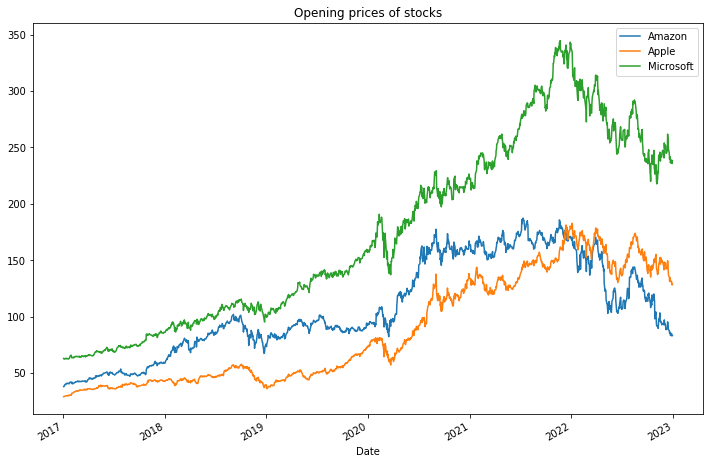

In [6]:
#Opening prices of stocks
Amazon['Open'].plot(label="Amazon",figsize = (12,8), title = 'Opening Prices')
Apple['Open'].plot(label="Apple")
Microsoft['Open'].plot(label="Microsoft")
plt.title('Opening prices of stocks')
plt.legend();

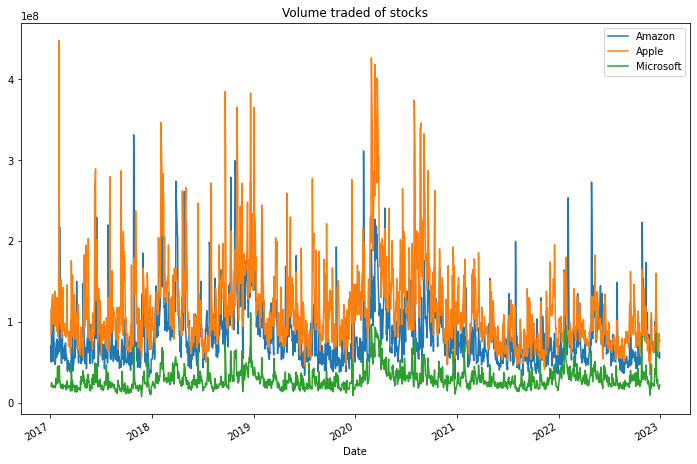

In [7]:
#Volume traded of stocks
Amazon['Volume'].plot(label="Amazon",figsize = (12,8), title = 'Volume Traded')
Apple['Volume'].plot(label="Apple")
Microsoft['Volume'].plot(label="Microsoft")
plt.title('Volume traded of stocks')
plt.legend();

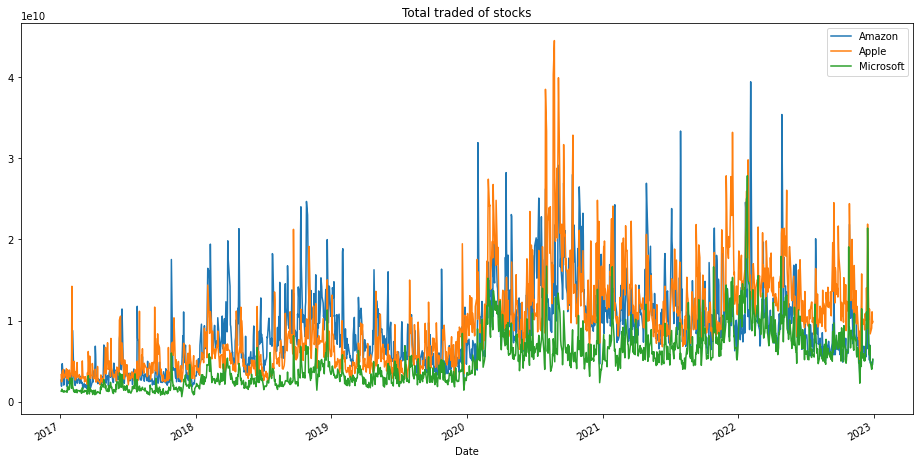

In [8]:
#Total traded
Amazon['Total Traded'] = Amazon['Open']*Amazon['Volume']
Apple['Total Traded'] = Apple['Open']*Apple['Volume']
Microsoft['Total Traded'] = Microsoft['Open']*Microsoft['Volume']
Amazon["Total Traded"].plot(label ="Amazon", figsize = (16,8))
Apple["Total Traded"].plot(label ="Apple", figsize = (16,8))
Microsoft["Total Traded"].plot(label ="Microsoft", figsize = (16,8))
plt.title('Total traded of stocks')
plt.legend();

***From 2017 to 2022,Microsoft always had the highest stock prices but also the lowest volume traded. Apple had the higest volumn traded over time. ***

**DAILY RETURN OF STOCKS**


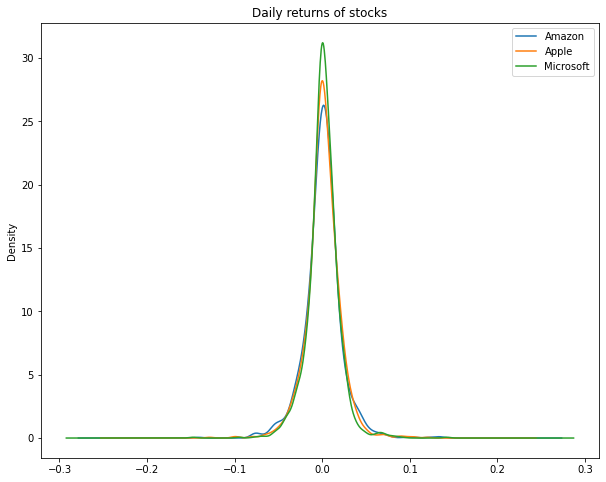

In [9]:
Amazon['returns'] = Amazon['Close'].pct_change(1)
Apple['returns'] = Apple['Close'].pct_change(1)
Microsoft['returns'] = Microsoft['Close'].pct_change(1)
Amazon['returns'].plot(kind = 'kde',label = "Amazon",figsize = (10,8))
Apple['returns'].plot(kind = 'kde',label = "Apple",figsize = (10,8))
Microsoft['returns'].plot(kind = 'kde',label = "Microsoft",figsize = (10,8))
plt.title('Daily returns of stocks')
plt.legend();

Text(0.5, 1.0, 'Daily returns of stocks')

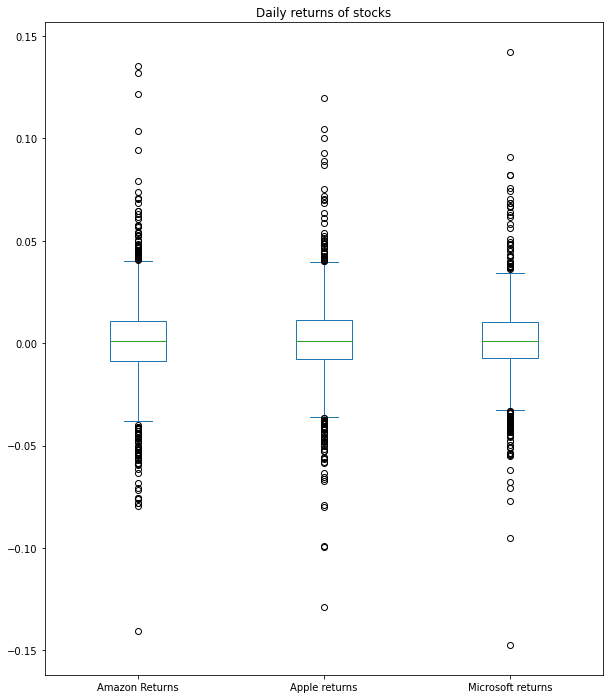

In [10]:
box_df = pd.concat([Amazon['returns'],Apple['returns'],Microsoft['returns']],axis = 1)
box_df.columns = ["Amazon Returns", "Apple returns", "Microsoft returns"]
box_df.plot(kind = 'box',figsize = (10,12))
plt.title('Daily returns of stocks')

**It's clear to see that Microsoft tend to be more stable, less risky than Amazon and Apple**

**CUMULATIVE RETURNS OF STOCKS**

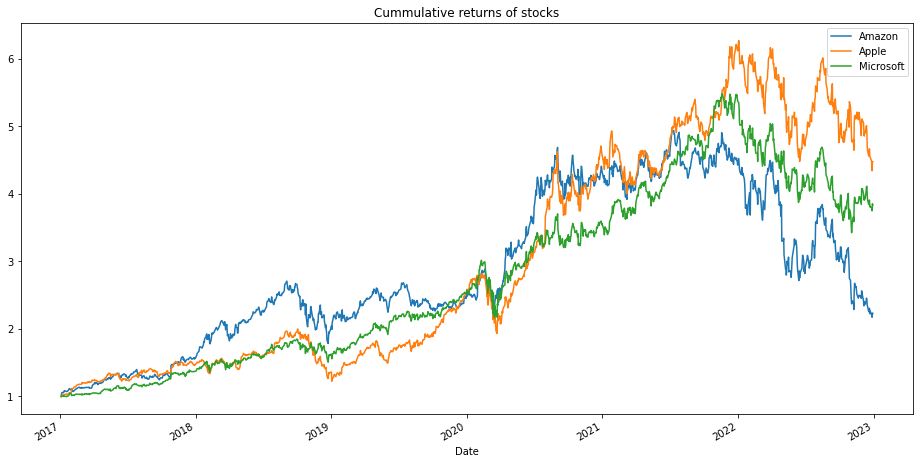

In [11]:
Amazon['Cumulative Return'] = (1 + Amazon['returns']).cumprod()
Apple['Cumulative Return'] = (1 + Apple['returns']).cumprod()
Microsoft['Cumulative Return'] = (1 + Microsoft['returns']).cumprod()

Amazon['Cumulative Return'].plot(label = 'Amazon', figsize = (16,8))
Apple['Cumulative Return'].plot(label = 'Apple', figsize = (16,8))
Microsoft['Cumulative Return'].plot(label = 'Microsoft', figsize = (16,8))
plt.title('Cummulative returns of stocks')
plt.legend()

**From Sep 2021 to Dec 2022, both stocks decreased due to the bad effects of Covid-19 in which Amazon had the biggest change**

**SHARPE RATIO**

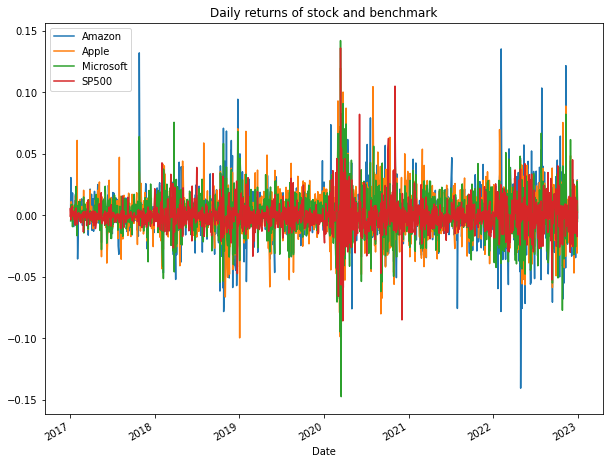

In [12]:
#Daily returns
SP500['returns'] = SP500['Close'].pct_change(1)
#Compare
Amazon['returns'].plot(kind = 'line',label = "Amazon",figsize = (10,8))
Apple['returns'].plot(kind = 'line',label = "Apple",figsize = (10,8))
Microsoft['returns'].plot(kind = 'line',label = "Microsoft",figsize = (10,8))
SP500['returns'].plot(kind = 'line',label = "SP500",figsize = (10,8))
plt.title('Daily returns of stock and benchmark')
plt.legend();



In [13]:
#Excess return
Amazon['Excess_return'] = Amazon['returns'].sub(SP500['returns'], axis = 0)
Apple['Excess_return'] = Apple['returns'].sub(SP500['returns'], axis = 0)
Microsoft['Excess_return'] = Microsoft['returns'].sub(SP500['returns'], axis = 0)
#Annual Sharpe ratio
Amazon['Sharpe_ratio_annual'] = ((Amazon['Excess_return'].mean())/(Amazon['Excess_return'].std())*np.sqrt(252))
Apple['Sharpe_ratio_annual'] = ((Apple['Excess_return'].mean())/(Apple['Excess_return'].std())*np.sqrt(252))
Microsoft['Sharpe_ratio_annual'] = ((Microsoft['Excess_return'].mean())/(Microsoft['Excess_return'].std())*np.sqrt(252))
Sharpe_ratio = [Amazon['Sharpe_ratio_annual'][1], Apple['Sharpe_ratio_annual'][1], Microsoft['Sharpe_ratio_annual'][1]]
Sharpe_ratio



[0.4787334933752839, 0.8216629822345413, 0.9116390248805826]

**Given the three Sharpe ratios, from 2017 to 2022, Microsoft had a Sharpe ratio twice as high as Amazon and nearly 11% higher than Apple. This means that an investment in Microsoft returned twice as much compared to the Amazon for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Microsoft would have been more attractive.
=> Based on historical data and Sharpe ratio, Microsoft and Apple are more attractive than Amazon**



**PORTFOLIO MAXIMIZATION** : I create a portfolio with these three stocks then maximize the returns for the risk assumed


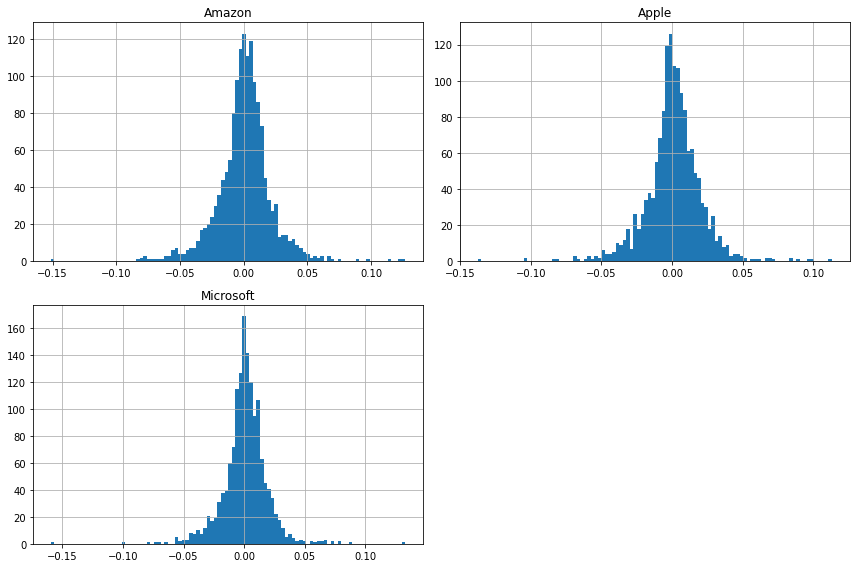

In [14]:
#Create portfolio
Portfolio = pd.concat([Amazon['Close'], Apple['Close'], Microsoft['Close']], ignore_index = False, axis = 1)
Portfolio.columns = ['Amazon', 'Apple', 'Microsoft']
Portfolio.pct_change().mean() 
Portfolio.pct_change().corr()
#Returns
log_returns = np.log(Portfolio/Portfolio.shift(1))
log_returns.hist(bins = 100, figsize = (12,8))
plt.tight_layout()



In [15]:
#Add random weight to find expected return, volalitity and sharpe ratio
np.random.seed(1001)
print(Portfolio.columns)
weights = np.array(np.random.random(3))
weights = weights/np.sum(weights)
print(weights)
#Expected Return
print('Expected Portfolio Return')
exp_returns = np.sum((log_returns.mean() * weights) * 252)
print(exp_returns)
#Expected Volatility
print('Expected Volatility')
exp_volatility = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
print(exp_volatility)
#Sharpe Ratio
print('Sharpe Ratio')
SR = exp_returns / exp_volatility
print(SR)

Index(['Amazon', 'Apple', 'Microsoft'], dtype='object')
[0.39907456 0.34542459 0.25550085]
Expected Portfolio Return
0.19718017169785448
Expected Volatility
0.2841708916352034
Sharpe Ratio
0.6938788507268334


In [25]:
#Run this 10000x to optimize portfolio using Monte Carlo simulation 
np.random.seed(101)
numberOfPortfolios = 10000
all_weights = np.zeros((numberOfPortfolios , len(Portfolio.columns)))
return_arr = np.zeros(numberOfPortfolios)
volatility_arr = np.zeros(numberOfPortfolios)
sharpeRatio_arr = np.zeros(numberOfPortfolios)

for index in range(numberOfPortfolios):

    #Weights
    weights = np.array(np.random.random(3))
    weights = weights/np.sum(weights)
    
    #Save Weights
    all_weights[index,:] = weights

    #Expected Return
    return_arr[index] = np.sum((log_returns.mean() * weights) * 252)

    #Expected Volatility
    volatility_arr[index] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))

    #Sharpe Ratio
    sharpeRatio_arr[index] = return_arr[index] / volatility_arr[index]
#Find the max sharpe ratio
sharpeRatio_arr.max()
print('The ideal Sharpe ratio is: '+str(sharpeRatio_arr.max()))

The ideal Sharpe ratio is: 0.8372906260315788


**By using Monte Carlo simulation, the ideal Sharpe ratio is 0.837
 but it takes too long for processing.**


Text(0, 0.5, 'Return')

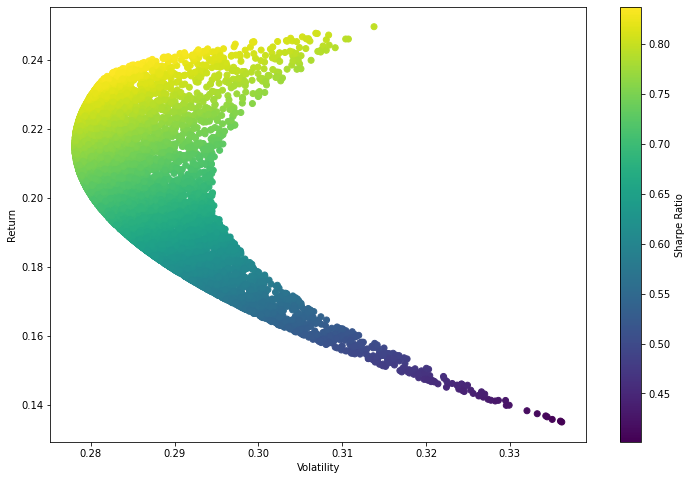

In [23]:
#Efficient Frontier
plt.figure(figsize = (12,8));
plt.scatter(volatility_arr,return_arr,c = sharpeRatio_arr);
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')


In [39]:
#Optimal function
def get_optimal_SR(weights):
    weights = np.array(weights)
    return_op = np.sum(log_returns.mean() * weights) * 252
    volatility = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
    SR = return_op / volatility
    return np.array([return_op,volatility,SR])

In [31]:
#Helper functions
def negative_SR(weights):
    return get_optimal_SR(weights)[2] * -1

def check_sum(weights):
    #Returns zero if sum of weights is 1
    return np.sum(weights) - 1

constraints = ({'type' : 'eq' , 'fun' : check_sum})

#Values must be between 0 and 1
bounds = ((0,1),(0,1),(0,1))

inital_guess = [0.33, 0.33, 0.34]


In [32]:
#SLSQP - Sequential Least Squares Programming Minimization technique
optimal_results = minimize(negative_SR , inital_guess, method = 'SLSQP', bounds = bounds, constraints=constraints)

In [35]:
#Optimal Allocations
optimal_results.x

array([0.        , 0.53206163, 0.46793837])

In [40]:
#Returns [Daily Returns, Volatility, Optimal Sharpe Ratio]
get_optimal_SR(optimal_results.x)

array([0.23812142, 0.28429731, 0.83757885])

***The optimal portfolio has 53.2% of Apple's stocks and 46.8% of Microsoft's stocks with daily return equals to 23,8%, volatility equals to 0.284 and the optimal Sharpe ratio equals to 0.837 ***